In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



X = np.load("../EncodedData/cancer-pca-200.npy",mmap_mode="r")
print(f"Loaded data")
print(f"Shape: {X.shape}")

Loaded data
Shape: (160000, 200)


In [2]:
def get_optimal_k(data: np.ndarray, max_k: int = 10):
    """
    Function to get the optimal k using the elbow method.
    
    Parameters:
        data (np.ndarray): The input data for clustering.
        max_k (int): The maximum number of clusters to test.
        
    Returns:
        int: The optimal number of clusters.
    """
    inertias = []
    k_values = range(2, max_k + 1)

    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        print(f"K={k} with silhouette of {silhouette_avg}")
        silhouette_scores.append(silhouette_avg)

    
    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Elbow plot
    ax1.plot(k_values, inertias, marker='o')
    ax1.set_title("Elbow Method for Optimal k")
    ax1.set_xlabel("Number of Clusters (k)")
    ax1.set_ylabel("Inertia")
    ax1.set_xticks(k_values)
    ax1.grid(True)
    
    # Silhouette score plot
    ax2.plot(k_values, silhouette_scores, marker='o', color='red')
    ax2.set_title("Silhouette Score for Different k")
    ax2.set_xlabel("Number of Clusters (k)")
    ax2.set_ylabel("Silhouette Score")
    ax2.set_xticks(k_values)
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


    print("Inspect the elbow plot to determine the optimal k.")
    return inertias

In [3]:
# get_optimal_k(X,3)

In [ ]:


optimal_k =2 # Choose based on elbow method and domain knowledge
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette levol: {silhouette_avg}")

# Reshape cluster labels to the spatial dimensions of the image
coords = np.load("../Data/Cancer/cancer-150-1500-h5-coords.npy")  # shape: (num_points, 2)


Silhouette levol: 0.3252003788948059


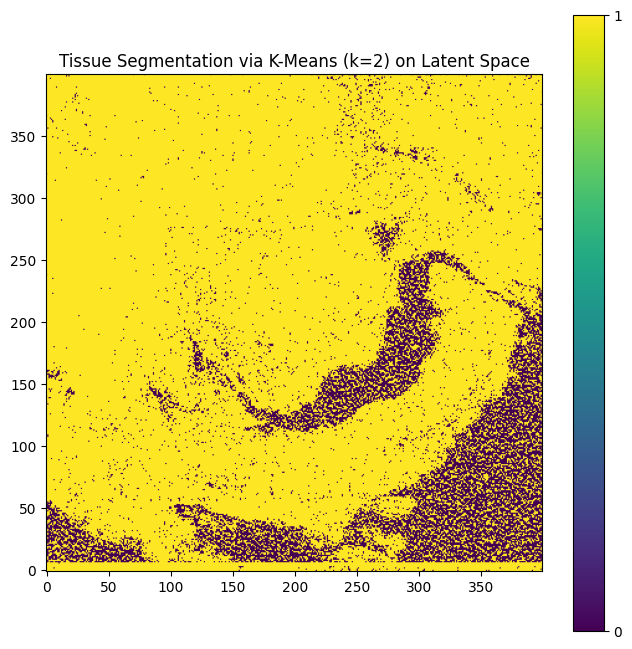

In [5]:
height, width = 400, 400  # Use existing variables

cluster_map = np.full((height, width), -1, dtype=int)
for idx, (x, y) in enumerate(coords):
    cluster_map[y, x] = cluster_labels[idx]

# Plot the cluster map
plt.figure(figsize=(8, 8))
plt.imshow(cluster_map, cmap='viridis', vmin=0, vmax=optimal_k-1, origin='lower')
plt.colorbar(ticks=range(optimal_k))
plt.title(f"Tissue Segmentation via K-Means (k={optimal_k}) on Latent Space")
plt.show()

In [6]:
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)
print(f"\nCluster Statistics:")
print(f"Total number of pixels: {len(cluster_labels)}")
for cluster_id, count in zip(unique_clusters, cluster_counts):
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} pixels ({percentage:.2f}%)")


Cluster Statistics:
Total number of pixels: 160000
Cluster 0: 22028 pixels (13.77%)
Cluster 1: 137972 pixels (86.23%)


In [7]:
colors = [
    (0, 0, 1),      # blue
    (0, 1, 0),      # green
    (1, 0, 0),      # red
    (1, 0.647, 0),  # orange
    (0.5, 0, 0.5),  # purple
    (0.647, 0.165, 0.165),  # brown
    (1, 0.753, 0.796),      # pink
    (0.5, 0.5, 0.5),        # gray
    (0.5, 0.5, 0),          # olive
    (0, 1, 1)       # cyan
]

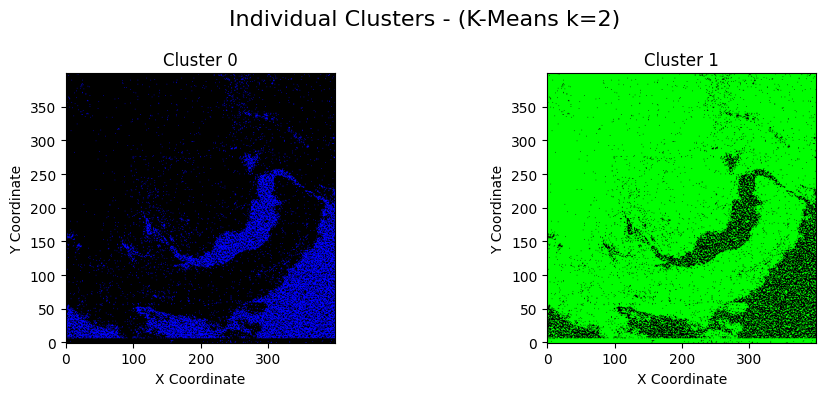

In [8]:
import math
cols = min(3, optimal_k)  # Maximum 3 columns
rows = math.ceil(optimal_k / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
if optimal_k == 1:
    axes = [axes]
elif rows == 1:
    axes = axes.reshape(1, -1)

for cluster_id in range(optimal_k):
    row = cluster_id // cols
    col = cluster_id % cols
    
    cluster_only_map = np.zeros((height, width, 3), dtype=np.uint8)  # Default to black
    cluster_color = [int(c * 255) for c in colors[cluster_id % len(colors)]]  # Scale RGB to 0-255
    cluster_only_map[cluster_map == cluster_id] = cluster_color

    # Plot the cluster map
    axes[row, col].imshow(cluster_only_map, origin='lower')
    axes[row, col].set_title(f"Cluster {cluster_id}")
    axes[row, col].set_xlabel('X Coordinate')
    axes[row, col].set_ylabel('Y Coordinate')

    

# Hide empty subplots if any
for i in range(optimal_k, rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].set_visible(False)

plt.suptitle(f"Individual Clusters - (K-Means k={optimal_k})", fontsize=16)
plt.tight_layout()

# Save subplot figure
plt.show()

In [1]:
kmeans.inertia_


NameError: name 'kmeans' is not defined